In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
print('total train dataset', mnist.train.images.shape[0])
print('total test dataset', mnist.test.images.shape[0])
print('dimension of picture', mnist.train.images.shape[1])
print('total unique classes', np.unique(np.argmax(mnist.train.labels,axis=1)))

total train dataset 55000
total test dataset 10000
dimension of picture 784
total unique classes [0 1 2 3 4 5 6 7 8 9]


In [0]:
class CNN:
  def __init__(self, input_size, output_size, size_layer, learning_rate):
    self.X = tf.placeholder(tf.float32, (None, input_size,input_size,1))
    self.Y = tf.placeholder(tf.float32, (None, output_size))
    kernel1 = tf.Variable(tf.random_normal([3, 3, 1, 8]))
    b1 = tf.Variable(tf.random_normal([8]))
    kernel2 = tf.Variable(tf.random_normal([3, 3, 8, 16]))
    b2 = tf.Variable(tf.random_normal([16]))
    kernel3 = tf.Variable(tf.random_normal([3, 3, 16, 32]))
    b3 = tf.Variable(tf.random_normal([32]))
    feed = tf.nn.relu(tf.nn.conv2d(self.X, kernel1, [1,1,1,1], 'SAME') + b1)
    pool = tf.nn.max_pool(feed, ksize = [1, 3, 3, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    feed = tf.nn.relu(tf.nn.conv2d(pool, kernel2, [1,1,1,1], 'SAME') + b2)
    pool = tf.nn.max_pool(feed, ksize = [1, 3, 3, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    feed = tf.nn.relu(tf.nn.conv2d(pool, kernel3, [1,1,1,1], 'SAME') + b3)
    pool = tf.nn.max_pool(feed, ksize = [1, 3, 3, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    shape_pulling = int(pool.shape[1]) * int(pool.shape[2]) * int(pool.shape[3])
    w1 = tf.Variable(tf.random_normal([shape_pulling, size_layer]))
    w2 = tf.Variable(tf.random_normal([size_layer, output_size]))
    flatten_conv = tf.reshape(pool, (-1, shape_pulling))
    feed = tf.nn.relu(tf.matmul(flatten_conv, w1))
    self.logits = tf.matmul(feed, w2)
    self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.Y, logits=self.logits))
    self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(self.cost)

In [0]:
SIZE = 256
EPOCH = 10
BATCH_SIZE = 128
LEARNING_RATE = 0.001
INPUT_SIZE = int(np.sqrt(mnist.train.images.shape[1]))

In [5]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = CNN(INPUT_SIZE, np.unique(np.argmax(mnist.train.labels,axis=1)).shape[0], SIZE, LEARNING_RATE)
sess.run(tf.global_variables_initializer())

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [6]:
LOSS, ACCURACY, ACCURACY_TEST = [], [], []
for i in range(EPOCH):
  total_loss, total_acc = 0, 0
  for k in range(0, (mnist.train.images.shape[0] // BATCH_SIZE) * BATCH_SIZE, BATCH_SIZE):
    batch_x = mnist.train.images[k:k+BATCH_SIZE, :].reshape((-1, INPUT_SIZE, INPUT_SIZE, 1))
    batch_y = mnist.train.labels[k:k+BATCH_SIZE, :]
    logits, loss, _ = sess.run([model.logits, model.cost, model.optimizer], feed_dict={model.X:batch_x, model.Y:batch_y})
    acc = np.mean(np.argmax(logits,axis=1)==np.argmax(batch_y,axis=1))
    total_loss += loss
    total_acc += acc
  total_loss /= (mnist.train.images.shape[0] // BATCH_SIZE)
  total_acc /= (mnist.train.images.shape[0] // BATCH_SIZE)
  LOSS.append(total_loss)
  ACCURACY.append(total_acc)
  total_acc = 0
  for k in range(0, (mnist.test.images.shape[0] // BATCH_SIZE) * BATCH_SIZE, BATCH_SIZE):
    batch_x = mnist.test.images[k:k+BATCH_SIZE, :].reshape((-1, INPUT_SIZE, INPUT_SIZE, 1))
    batch_y = mnist.test.labels[k:k+BATCH_SIZE, :]
    logits = sess.run(model.logits, feed_dict={model.X:batch_x})
    acc = np.mean(np.argmax(logits,axis=1)==np.argmax(batch_y,axis=1))
    total_acc += acc
  total_acc /= (mnist.test.images.shape[0] // BATCH_SIZE)
  ACCURACY_TEST.append(total_acc)
  print('epoch %d, loss %f, training accuracy %f, testing accuracy %f'%(i+1, LOSS[-1], ACCURACY[-1], ACCURACY_TEST[-1]))

epoch 1, loss 2401.570043, training accuracy 0.451322, testing accuracy 0.696715
epoch 2, loss 417.922594, training accuracy 0.758195, testing accuracy 0.812600
epoch 3, loss 255.904756, training accuracy 0.827269, testing accuracy 0.855369
epoch 4, loss 189.581769, training accuracy 0.859721, testing accuracy 0.878706
epoch 5, loss 148.876516, training accuracy 0.880336, testing accuracy 0.889924
epoch 6, loss 121.784779, training accuracy 0.895615, testing accuracy 0.903446
epoch 7, loss 103.611532, training accuracy 0.906214, testing accuracy 0.911558
epoch 8, loss 90.015510, training accuracy 0.915155, testing accuracy 0.921975
epoch 9, loss 77.357625, training accuracy 0.921529, testing accuracy 0.925080
epoch 10, loss 68.780834, training accuracy 0.926573, testing accuracy 0.928886


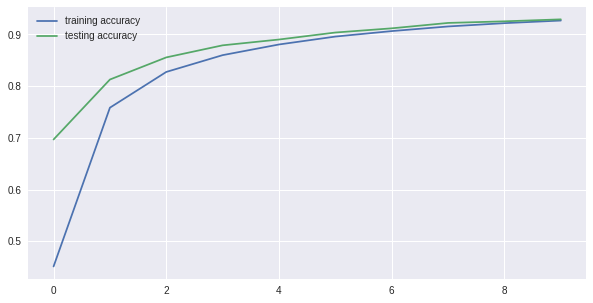

In [7]:
plt.figure(figsize=(10,5))
plt.plot(ACCURACY, label='training accuracy')
plt.plot(ACCURACY_TEST, label='testing accuracy')
plt.legend()
plt.show()